# ĐỒ ÁN CUỐI KÌ - Phân tích dữ liệu thông minh CQ2018/21

### Giảng viên lý thuyết: Nguyễn Tiến Huy
### Hướng dẫn thực hành: Dương Nguyễn Thái Bảo
__Thông tin nhóm:__
> STT: 12

> Thành viên:
* Đặng Hữu Thắng - MSSV: 18120555 (Nhóm trưởng)
* Nguyễn Trung Thành - MSSV: 18120565
* Phạm Xuân Thành - MSSV: 18120567
* Đặng Minh Thọ - MSSV: 18120579
* Phạm Đình Thục - MSSV: 18120584

## Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
globalcolors = ['092a35', 'a2738c', '645c84', '427996', '658525', '404b69', '0f4471', '0f4471', '0f4471', '0f4471']

import warnings
warnings.filterwarnings('ignore')

C:\Users\Admin\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Admin\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Load data

In [2]:
df_1 = pd.read_csv('archive/caracter_final.csv')
df_2 = pd.read_csv('archive/places_final.csv')
df_3 = pd.read_csv('archive/usagers_final.csv')
df_4 = pd.read_csv('archive/vehicules_final.csv')

## Sơ lược về dữ liệu

Đây là dữ liệu về tai nạn giao thông của Pháp từ năm 2014 - 2018, được lấy từ trang chủ của cổng data chính phủ của Pháp [data](https://www.data.gouv.fr/en/datasets/bases-de-donnees-annuelles-des-accidents-corporels-de-la-circulation-routiere-annees-de-2005-a-2019/).

Dữ liệu được chia theo năm, mỗi năm có 4 file csv khác nhau (Characteristics - Locations - Vehicles - Users) nên nhóm em đã gom lại 5 năm vào chung 1 file -> chúng ta có tất cả là 4 file csv dữ liệu của 5 năm để tiện phân tích hơn

Dữ liệu được chia làm 4 file:
* __caracter_final.csv__: *Characteristics*, bao gồm các thông tin cơ bản về vụ tai nạn như thời gian, địa điểm theo kinh/vĩ độ, điều kiện ánh sáng, thời tiết, ...
* __places_final.csv__: *Locations*, chi tiết hơn về nơi xảy ra tai nạn như mã số định danh của đường (giống như tên đường ở Việt Nam), tình trạng mặt đường, mốc lộ giới, ...
* __usagers_final.csv__: *Users*, chi tiết về người bị tai nạn như mức độ bị thương, năm sinh, ...
* __vehicules_final.csv__: *Vehicles*, chi tiết về loại xe bị tai nạn

## Khám phá dữ liệu - lọc ra những đặc trưng cần thiết & Phân tích từng file data

Vì dữ liệu có rất nhiều đặc trưng/ cột không cần thiết hoặc không nằm trong những gì nhóm định phân tích, nên nhóm sẽ tiến hành loại bỏ,
sau đó sẽ tiến hành phân tích từng file data

### File **caracter_final.csv** - Thông tin cơ bản về vụ tai nạn

In [3]:
df_1.sample(n=10)

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col,com,adr,gps,lat,long,dep
230373,201500052458,15,8,9,1010,1,2,2,2.0,3.0,112,"40, BOULEVARD DIDEROT",NaN,NaN,NaN,750
273865,201400037296,14,3,21,240,5,2,1,1.0,6.0,194,"129, BONNEUIL MATOURS (R",NaN,NaN,NaN,860
216015,201500038100,15,10,22,2225,5,2,1,1.0,2.0,25,"130, C.DE G.> 130 & 1103",NaN,NaN,NaN,920
44823,201800044824,18,4,27,940,1,1,1,1.0,3.0,7,AUTOROUTE A3,M,4892610.0,248146.0,930
4712,201800004713,18,7,20,1635,1,1,1,9.0,1.0,211,RD 927 Z,M,4906710.0,210540.0,950
110630,201700052848,17,11,24,1900,5,2,7,1.0,6.0,101,PLACE DU CHATELET,M,4885730.0,234679.0,750
238804,201400002235,14,9,19,2300,3,1,1,1.0,6.0,232,LES ROCHETTES,M,4671222.0,-116331.0,850
275638,201400039069,14,9,20,2300,5,2,1,1.0,6.0,4,"04, ARGENTEUIL AV D'",NaN,NaN,NaN,920
133810,201600015327,16,8,17,430,4,1,1,1.0,6.0,55,"00, SAINT ANTOINE A SAIN",M,4337065.0,535992.0,130
38024,201800038025,18,5,3,2030,1,2,2,1.0,3.0,35,National ( boulevard ),M,4990686.0,223874.0,920


Theo như file description kèm theo thì chúng ta có ý nghĩa của các cột như sau:
* __*an*__: năm
* __*mois*__: tháng
* __*jour*__: ngày
* __*hrmn*__: thời điểm xày ra tai nạn theo "giờ:phút"
* __*lum*__: light - điều kiện ánh sáng
* __*agg*__: nơi xảy ra nằm ngoài/ trong khu đông dân cư
* __*int*__: ngã tư - loại nút giao thông
* __*atm*__: điều kiện thời tiết
* __*col*__: loại va chạm (bao nhiêu xe - kiểu va chạm)
* __*com*__: mã của [Commune](https://en.wikipedia.org/wiki/Communes_of_France) (đơn vị chính quyền thấp nhất) do [INSEE](https://en.wikipedia.org/wiki/Institut_national_de_la_statistique_et_des_%C3%A9tudes_%C3%A9conomiques) cung cấp
* __*adr*__: mã bưu chính của khu vực
* __*gps*__: mã GPS chỉ khu vực/ vùng lãnh thổ thuộc Pháp mà tai nạn đó xảy ra, ví dụ như M = [Métropole](https://en.wikipedia.org/wiki/M%C3%A9tropole), A = [Antilles](https://vi.wikipedia.org/wiki/T%C3%A2y_%E1%BA%A4n_thu%E1%BB%99c_Ph%C3%A1p) hay G = [Guyane](https://vi.wikipedia.org/wiki/Guyane_thu%E1%BB%99c_Ph%C3%A1p)
* __*lat*__: vĩ độ
* __*long*__: kinh độ
* __*dep*__: mã của [Département](https://en.wikipedia.org/wiki/Departments_of_France) (đơn vị chính quyền cấp cao) do [INSEE](https://en.wikipedia.org/wiki/Institut_national_de_la_statistique_et_des_%C3%A9tudes_%C3%A9conomiques) cung cấp

Theo nhóm, các cột sau sẽ được loại bỏ:
* __*com*__ và __*dep*__: việc search bảng mã và so khớp với dữ liệu sẽ tốn rất nhiều thời gian, hơn nữa rào cản về ngôn ngữ và hệ thông chính quyền của Pháp có thể sẽ làm nhóm định nghĩa sai về các giá trị của cột -> loại bỏ
* __*adr*__: đây là địa chỉ chi tiết đến từng số nhà -> số lượng địa chỉ rất lớn và sẽ không mang lại nhiều giá trị vì nó không đại diện cho 1 khu vực, nếu có thể gom nhóm địa chỉ lại theo khu vực quận/thành phố thì nhóm sẽ giữ lại, tuy nhiên vì trở ngại về ngôn ngữ, thời gian nên nhóm lựa chọn không giữ thuộc tính này
* __*gps*__: vì không có đủ kiến thức về địa lý để phân tích
* __*lat*__ và __*long*__: tương tự như __*adr*__

In [4]:
df_1.drop(columns=['com', 'adr', 'gps', 'lat', 'long', 'dep'], inplace=True)
df_1

,Num_Acc,an,mois,jour,hrmn,lum,agg,int,atm,col
0,201800000001,18,1,24,1505,1,1,4,1.0,1.0
1,201800000002,18,2,12,1015,1,2,7,7.0,7.0
2,201800000003,18,3,4,1135,1,2,3,1.0,7.0
3,201800000004,18,5,5,1735,1,2,1,7.0,3.0
4,201800000005,18,6,26,1605,1,2,1,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...
296419,201400059850,14,12,24,1700,1,2,1,1.0,7.0
296420,201400059851,14,12,24,1850,2,2,1,1.0,7.0
296421,201400059852,14,12,27,140,3,1,1,1.0,7.0
296422,201400059853,14,12,28,1100,1,1,1,1.0,7.0


Như vậy sau khi loại bỏ các cột không cần thiết/ không dùng, chúng ta có mô tả dữ liệu như sau:
* __*an*__: năm
* __*mois*__: tháng
* __*jour*__: ngày
* __*hrmn*__: thời điểm xày ra tai nạn theo "giờ:phút"
* __*lum*__: light - điều kiện ánh sáng nơi xảy ra tai nạn
    * 1 - Ban ngày
    * 2 - Chạng vạng hoặc bình minh
    * 3 - Ban đêm không có ánh sáng công cộng
    * 4 - Ban đêm không bật đèn chiếu sáng công cộng
    * 5 - Ban đêm có bật đèn chiếu sáng công cộng
* __*agg*__: nơi xảy ra nằm ngoài/ trong khu đông dân cư
    * 1 - Ngoài khu dân cư
    * 2 - Trong khu dân cư
* __*int*__: ngã tư - loại nút giao thông - giao lộ
    * 1 - Ở ngoài nút giao thông
    * 2 - Giao lộ chữ X ([scissors intersection](https://www.google.com/search?q=Scissor+intersection&rlz=1C1PRFI_enVN813VN813&sxsrf=ALeKk007Il679pugVr_O0ByAXaAxNpe_TQ:1622557031267&source=lnms&tbm=isch&sa=X&ved=2ahUKEwj0tuf7z_bwAhXf63MBHVChBvIQ_AUoAXoECAEQAw&biw=1536&bih=760#imgrc=amocEsgI3TRiRM))
    * 3 - Giao lộ chữ T
    * 4 - Giao lộ chữ Y
    * 5 - Giao lộ có hơn 4 nhánh rẽ
    * 6 - Vòng xuyến
    * 7 - [Place](https://fr.wikipedia.org/wiki/Place_(voie)): tựa tựa như phố Bùi Viện ở TP.HCM
    * 8 - Giao nhau với đường sắt
    * 9 - Nút giao thông khác
* __*atm*__: điều kiện thời tiết
    * 1 - Bình thường
    * 2 - Mưa nhẹ
    * 3 - Mưa lớn
    * 4 - Tuyết - Mưa đá
    * 5 - Sương mù - Khói
    * 6 - Gió mạnh - Bão
    * 7 - Nắng chói
    * 8 - Thoáng đãng, có mây
    * 9 - Các kiểu thời tiết khác
* __*col*__: loại va chạm (bao nhiêu xe - kiểu va chạm)
    * 1 - 2 xe - đâm trực diện
    * 2 - 2 xe - đâm từ phía sau
    * 3 - 2 xe - va chạm từ bên hông
    * 4 - Từ 3 xe trở lên - đâm liên tiếp nhau
    * 5 - Từ 3 xe trở lên - nhiều va chạm cùng lúc
    * 6 - Các loại va chạm khác (Tức là không phải va chạm giữa xe - xe với nhau. VD: mất lái đâm vào dải phân cách; va chạm với người đi bộ, tàu hỏa, ...)
    * 7 - Không có va chạm (mất lái hoặc đánh lái bất ngờ bị văng xe đi, ...)

In [5]:
# Kiểm tra tỉ lệ % dữ liệu bị thiếu
df_1.isna().mean()*100

Num_Acc    0.000000
an         0.000000
mois       0.000000
jour       0.000000
hrmn       0.000000
lum        0.000000
agg        0.000000
int        0.000000
atm        0.011470
col        0.003374
dtype: float64

In [6]:
df_1_temp = df_1.copy()

#### Xu hướng tăng giảm số vụ tai nạn giao thông qua các năm

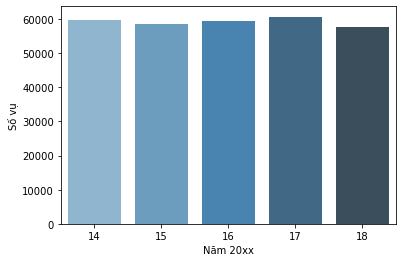

In [7]:
ax = sns.countplot(data=df_1_temp, x='an', palette='Blues_d')
ax.set(xlabel='Năm 20xx', ylabel='Số vụ')
plt.show()

* Có vẻ như số vụ tai nạn không có biến động gì lớn qua các năm -> không có gì đặc biệt

#### Các vụ tai nạn thường xảy ra trong hay ngoài khu dân cư?

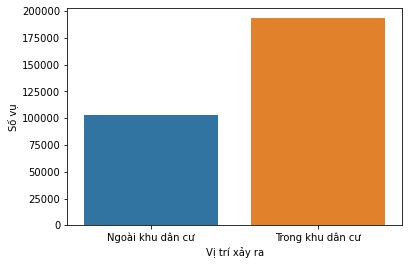

In [8]:
df_1_temp['agg'].replace({1:'Ngoài khu dân cư', 2:'Trong khu dân cư'}, inplace=True)
ax = sns.countplot(data=df_1_temp, x='agg')
ax.set(xlabel='Vị trí xảy ra', ylabel='Số vụ')
plt.show()

* Số vụ tai nạn trong khu dân cư gần __gấp đôi__ so với ở ngoài khu dân cư, có thể vì trong khu dân cư thì lưu lượng giao thông lớn hơn nên dễ xảy ra tai nạn hơn -> insight này không quan trọng lắm

#### Thời điểm nào trong ngày hay xảy ra tai nạn nhất? Vì sao?

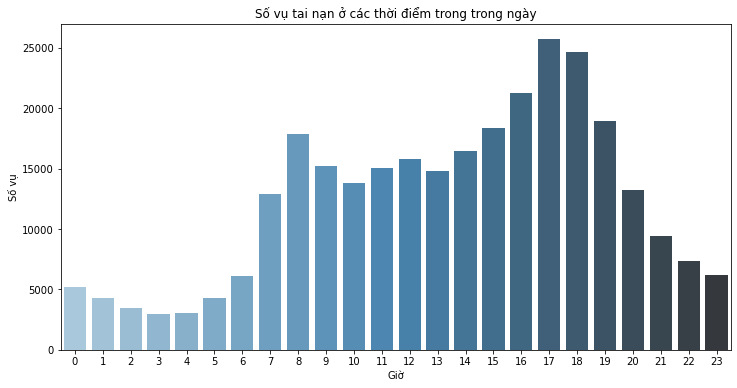

In [9]:
df_1['hour'] = df_1['hrmn']/100
df_1['hour'] = df_1['hour'].astype('int')
plt.figure(figsize=(12,6))
ax = sns.countplot(x='hour', data=df_1, palette="Blues_d")
ax.set(title='Số vụ tai nạn ở các thời điểm trong trong ngày', xlabel='Giờ', ylabel='Số vụ')
plt.show()

* Có thể thấy histogram của chúng ta có __2 đỉnh__ ở __8 AM__ và __17 PM__: đây là thời gian mọi người ra đường đi làm và tan làm -> lưu lượng giao thông tăng đột biến -> số vụ tai nạn tăng
* Số vụ tai nạn lúc tan làm __nhiều hơn__ so với lúc đi làm. __*Giải thích:*__ có thể vì lúc tan làm ai cũng đều mệt sau 1 ngày dài -> xuống sức, mất tập trung lúc lái xe -> tai nạn nhiều hơn

#### Điều kiện ánh sáng và thời tiết liệu có ảnh hưởng gì hay không?

In [10]:
df_1_temp['lum'].replace({1:'Ban ngày', 2:'Chạng vạng hoặc bình minh', 3:'Ban đêm không có ánh sáng công cộng', 4:'Ban đêm không bật đèn chiếu sáng công cộng', 5:'Ban đêm có bật đèn chiếu sáng công cộng'}, inplace=True)
df_1_temp['atm'].replace({1:'Bình thường', 2:'Mưa nhẹ', 3:'Mưa lớn', 4:'Tuyết - Mưa đá', 5:'Sương mù - Khói', 6:'Gió mạnh - Bão', 7:'Nắng chói', 8:'Thoáng đãng, có mây', 9:'Các kiểu thời tiết khác'}, inplace=True)

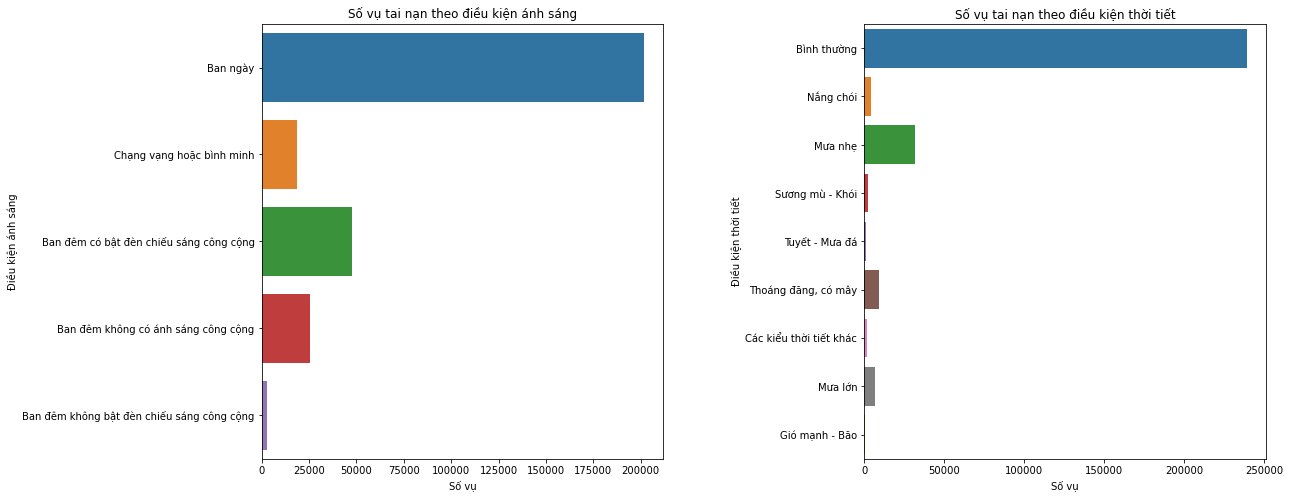

In [11]:
fig, ax = plt.subplots(figsize=(18, 8))
plt.subplots_adjust(wspace=0.5, hspace = 0.3)

ax = plt.subplot(1, 2, 1)
sns.countplot(data=df_1_temp, y='lum')
ax.set(title='Số vụ tai nạn theo điều kiện ánh sáng', xlabel='Số vụ', ylabel='Điều kiện ánh sáng')

ax = plt.subplot(1, 2, 2)
sns.countplot(data=df_1_temp, y='atm')
ax.set(title='Số vụ tai nạn theo điều kiện thời tiết', xlabel='Số vụ', ylabel='Điều kiện thời tiết')

plt.show()

* Khá bất ngờ khi ở cả 2 biểu đồ, số vụ tai nạn lại nhiều nhất ở điều kiện ánh sáng và thời tiết có thể coi là đẹp và khó xảy ra tai nạn nhất
* Ở biểu đồ điều kiện __thời tiết__, ta thấy tai nạn vào ban đêm lại xảy ra nhiều hơn nếu có bật đèn chiếu sáng công cộng

__*Giải thích:*__ Rất có thể khi điều kiện ánh sáng và thời tiết __xấu__ thì chúng ta sẽ tập trung cao độ để lái xe hơn -> __khó__ xảy ra tai nạn hơn, còn khi điều kiện xung quanh __tốt__ thì chũng ta sẽ dễ lơ là, chủ quan -> __tai nạn nhiều__

#### Nút giao thông nào thường xảy ra tai nạn nhất? Vì sao?

In [12]:
df_1_temp['int'].replace({1:'Ở ngoài nút giao thông', 2:'Giao lộ chữ X', 3:'Giao lộ chữ Y', 4:'Giao lộ chữ T', 5:'Giao lộ có hơn 4 nhánh rẽ', 6:'Vòng xuyến', 7:'Place', 8:'Giao nhau với đường sắt', 9:'Nút giao thông khác'}, inplace=True)

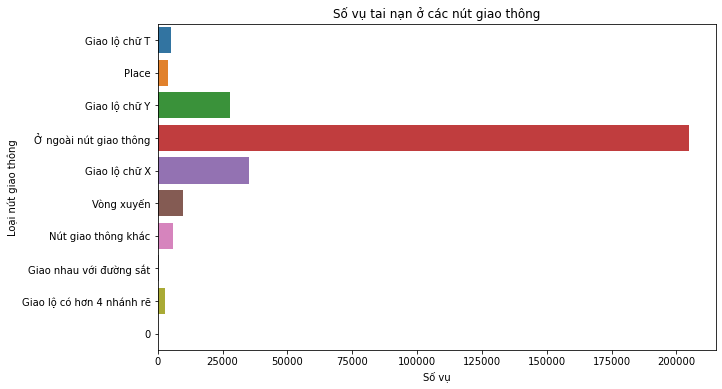

In [13]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_1_temp, y='int')
ax.set(title='Số vụ tai nạn ở các nút giao thông', xlabel='Số vụ', ylabel='Loại nút giao thông')
plt.show()

* Các vụ tai nạn xảy ra __nhiều__ ở những vị trí __không có__ nút giao thông.

__*Giải thích:*__ Có vẻ như lại tiếp tục là do sự chủ quan của người lái. Khi đến các giao lộ, chúng ta sẽ tập trung để chuyển làn đường, vận tốc sẽ thấp, và cũng như ở đây thì có đèn tín hiệu giao thông điều phối nên khó xảy ra tai nạn hơn

#### Loại va chạm nào gây ra thương vong lớn? Lí do?

In [14]:
df_1_temp['col'].replace({1:'2 xe - đâm trực diện', 2:'2 xe - đâm từ phía sau', 3:'2 xe - va chạm từ bên hông', 4: 'Từ 3 xe trở lên - đâm liên tiếp nhau', 5:'Từ 3 xe trở lên - nhiều va chạm cùng lúc', 6:'Các loại va chạm khác', 7: 'Không có va chạm'}, inplace=True)

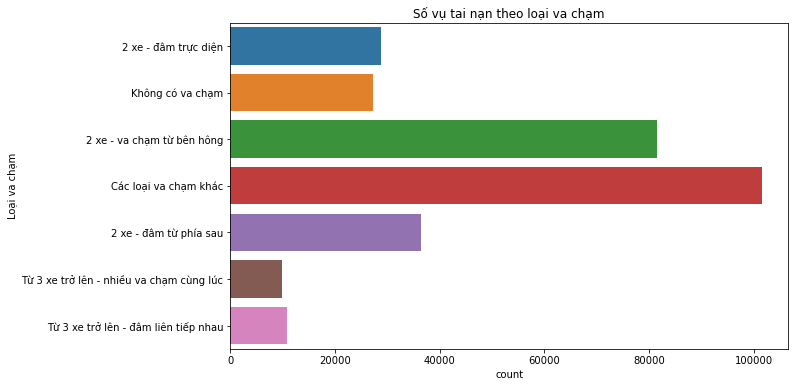

In [15]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_1_temp, y='col')
ax.set(title='Số vụ tai nạn theo loại va chạm', ylabel='Loại va chạm')
plt.show()

* Các vụ tai nạn chủ yếu là va __chạm từ bên hông__ hoặc __các loại va chạm khác__ (va chạm với vật cản, rào chắn hoặc người đi bộ, ...), mà ở trên chúng ta đã biết là phần lớn tai nạn xảy ra ở ngoài các nút giao thông, vậy:
    * __2 xe - va chạm từ bên hông:__ bình thường va chạm từ bên hông thì là do vượt đèn đỏ hoặc băng qua đường không cẩn thận, tuy nhiên như đã nói phần lớn tai nạn không xảy ra ở các giao lộ -> khả năng cao là xe vượt xe không thành công -> tai nạn
    * __Các loại va chạm khác:__ tức là phần lớn các tai nạn chỉ có 1 xe, tự người lái va chạm với vật cản -> trình trạng của tài xế có vấn đề (VD: say rượu, dùng chất kích thích, ...)

In [16]:
# Merge với df_3 để lấy dữ liệu về thương vong của người bị tai nạn
temp = df_1.merge(df_3, how='right')

keydict = {1:'2 xe - đâm trực diện', 2:'2 xe - đâm từ phía sau', 3:'2 xe - va chạm từ bên hông', 
    4: 'Từ 3 xe trở lên - đâm liên tiếp nhau', 5:'Từ 3 xe trở lên - nhiều va chạm cùng lúc', 6:'Các loại va chạm khác', 7: 'Không có va chạm'}

traces = []
for key, grp in temp.groupby(temp['col']):
    aggregated = grp.grav.value_counts().sort_index()
    x_values = aggregated.index.tolist()
    y_values = aggregated.values.tolist()
    x1,y1 = x_values, y_values  
    x1 = ['Không bị thương', 'Tử vong', 'Nhập viện', 'Bị thương nhẹ']

    trace1 = go.Bar(x=x1, y=y1, opacity=0.9, name= keydict[key])

    layout = dict(height=500, title='Thương vong của các loại va chạm tai nạn giao thông', legend=dict(orientation="h"), 
                    yaxis = dict(title = 'Số người thương vong'))
    traces.append(trace1)              
fig = go.Figure(data=traces, layout=layout);
iplot(fig);

* Có thể thấy số vụ tai nạn mà __2 xe va chạm từ bên hông__ chỉ nhiều thứ 2 nhưng lại có số người bị ảnh hưởng nhiều nhất. Tuy nhiên, hầu hết chỉ là bị thương nhẹ hoặc không bị thương
* Đối với loại va chạm __2 xe đâm trực diện__, tỉ lệ người bị thương khá cao, nhập viện khá cao (> __80%__) và tỉ lệ tử vong/ số vụ tai nạn là cao nhất (khoảng __14%__)

### File **places_final.csv** - Chi tiết về nơi xảy ra tai nạn

In [17]:
df_2

,Num_Acc,catr,voie,v1,v2,circ,nbv,pr,pr1,vosp,prof,plan,lartpc,larrout,surf,infra,situ,env1
0,201800000001,3,41,NaN,C,2.0,2.0,NaN,NaN,0.0,1.0,3.0,NaN,NaN,1.0,0.0,1.0,0.0
1,201800000002,4,41,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,2.0,NaN,NaN,1.0,0.0,1.0,0.0
2,201800000003,3,39,NaN,D,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
3,201800000004,3,39,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
4,201800000005,4,NaN,NaN,NaN,1.0,1.0,NaN,NaN,0.0,1.0,1.0,NaN,NaN,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296419,201400059850,4,0.0,NaN,NaN,2.0,2.0,NaN,NaN,0.0,2.0,3.0,0.0,60.0,1.0,0.0,3.0,99.0
296420,201400059851,4,0.0,NaN,NaN,2.0,2.0,NaN,NaN,0.0,1.0,1.0,0.0,60.0,1.0,0.0,1.0,99.0
296421,201400059852,4,0.0,NaN,NaN,2.0,2.0,NaN,NaN,0.0,2.0,2.0,0.0,60.0,9.0,0.0,1.0,0.0
296422,201400059853,2,3.0,NaN,NaN,1.0,2.0,55.0,0.0,0.0,2.0,3.0,0.0,80.0,1.0,0.0,1.0,99.0


Theo như file description kèm theo thì chúng ta có ý nghĩa của các cột như sau:
* __*catr*__: loại đường (quốc lộ, cao tốc, ...)
* __*voie*__: mã đường
* __*v1*__: chỉ số chỉ mã đường
* __*v2*__: chữ cái chỉ mã đường
* __*circ*__: số chiều của đường
* __*nbv*__: số làn đường
* __*pr*__: mốc lộ giới
* __*pr1*__: khoảng cách so với mốc lộ giới
* __*vosp*__: có làn đường đặc biệt ko
* __*prof*__: độ dốc
* __*plan*__: hình dạng đoạn đường
* __*lartpc*__: chiều rộng của dải phân cách
* __*larrout*__: chiều rộng của phần đường mà các phương tiện được lưu thông
* __*surf*__: tình trạng mặt đường (ẩm, có tuyết, ...)
* __*infra*__: quy hoạch - cơ sở hạ tầng xung quanh
* __*situ*__: vị trí tai nạn (trên đường, lề đường hay làn đường đặc biệt, ...)
* __*env1*__: gần với trường học?

Ta sẽ tiến hành loại bỏ các cột:
* __*voie*__, __*v1*__, __*v2*__: giống như __*adr*__, các đặc trưng này quá chi tiết và insight rút ra từ nó sẽ mang lại ít giá trị -> loại bỏ
* __*pr*__, __*pr1*__: 2 thuộc tính này cũng dùng để xác định vị trí, và lí do loại bỏ cũng giống như 3 thuộc trính trên
* __*lartpc*__, __*infra*__: thuộc tính này không sẽ không rút ra được insight nào, hoặc nếu có thì cũng sẽ có giá trị thấp

In [18]:
df_2.drop(columns=['voie', 'v1', 'v2', 'pr', 'pr1', 'lartpc', 'larrout', 'infra', 'env1'], inplace=True)
df_2

,Num_Acc,catr,circ,nbv,vosp,prof,plan,surf,situ
0,201800000001,3,2.0,2.0,0.0,1.0,3.0,1.0,1.0
1,201800000002,4,2.0,2.0,0.0,1.0,2.0,1.0,1.0
2,201800000003,3,2.0,2.0,0.0,1.0,1.0,1.0,1.0
3,201800000004,3,2.0,2.0,0.0,1.0,1.0,1.0,1.0
4,201800000005,4,1.0,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
296419,201400059850,4,2.0,2.0,0.0,2.0,3.0,1.0,3.0
296420,201400059851,4,2.0,2.0,0.0,1.0,1.0,1.0,1.0
296421,201400059852,4,2.0,2.0,0.0,2.0,2.0,9.0,1.0
296422,201400059853,2,1.0,2.0,0.0,2.0,3.0,1.0,1.0


Tương tự như ở file caracter_final, ta chỉ chọn ra các cột cần thiết:
* __*catr*__: loại đường (quốc lộ, cao tốc, ...)
    * 1 - Xa lộ
    * 2 - Quốc lộ
    * 3 - Đường cấp tỉnh
    * 4 - Đường cấp xã
    * 5 - Ngoài mạng lưới đường chính. VD: hẻm nhỏ, đường dân cư tự phát
    * 6 - Bãi đỗ xe công cộng
    * 9 - Khác
* __*circ*__: số chiều của đường
    * 1 - Một chiều
    * 2 - Hai chiều
    * 3 - [A chaussées séparées](https://fr.wikipedia.org/wiki/Route_%C3%A0_chauss%C3%A9es_s%C3%A9par%C3%A9es) tựa như Xa lộ Hà Nội ở TP.HCM nhưng rộng hơn và 2 làn cách biệt như 2 đường riêng biệt
    * 4 - Không có chiều cố định. VD như mấy con hẻm ở mình thì đi chiều nào cũng được
* __*nbv*__: số làn đường
* __*vosp*__: có làn đường đặc biệt ko
* __*prof*__: độ dốc
    * 0 - Không xác định
    * 1 - Phẳng
    * 2 - Dốc
    * 3 - Dốc đồi, sườn đồi
    * 4 - Vùng trũng xuống
* __*plan*__: hình dạng đoạn đường
    * 0 - Không xác định
    * 1 - Thẳng
    * 2 - Cong sang trái
    * 3 - Cong sang phải
    * 4 - Dạng hình chữ "S"
* __*surf*__: tình trạng mặt đường (ẩm, có tuyết, ...)
    * 0 - Không xác định
    * 1 - Bình thướng
    * 2 - Ẩm ướt
    * 3 - Vũng nước (kiểu ổ gà ngập nước)
    * 4 - Ngập nước
    * 5 - Có tuyết
    * 6 - Có bùn
    * 7 - Đóng băng
    * 8 - Có dầu
    * 9 - Khác
* __*situ*__: vị trí tai nạn (trên đường, lề đường hay làn đường đặc biệt, ...)
    * 0 - Không xác định
    * 1 - Trên đường
    * 2 - Trên phần đường khẩn cấp
    * 3 - Trên làn đường dừng khẩn cấp
    * 4 - Trên vỉa hè
    * 5 - Trên làn đường dành cho xe đạp

In [19]:
# Kiểm tra tỉ lệ % dữ liệu bị thiếu
df_2.isna().mean()*100

Num_Acc    0.000000
catr       0.000000
circ       0.360632
nbv        0.484779
vosp       0.591383
prof       0.449356
plan       0.561358
surf       0.444971
situ       1.508312
dtype: float64

In [20]:
df_2_temp = df_2.copy()

#### Điều kiện về địa hình, trình trạng con đường có ảnh hưởng gì hay không? Liệu có giống như ánh sáng và thời tiết?

In [21]:
df_2_temp['prof'].replace({0:'Không xác định', 1:'Phẳng', 2:'Dốc', 3:'Dốc đồi, sườn đồi', 4:'Vùng trũng xuống'}, inplace=True)
df_2_temp['plan'].replace({0:'Không xác định', 1:'Thẳng', 2:'Cong sang trái', 3:'Cong sang phải', 4:'Dạng hình chữ "S"'}, inplace=True)
df_2_temp['surf'].replace({0:'Không xác định', 1:'Bình thường', 2:'Ẩm ướt', 3:'Vũng nước', 4:'Ngập nước', 5:'Có tuyết', 6:'Có bùn', 7:'Đóng băng', 8:'Có dầu', 9:'Khác'}, inplace=True)
df_2_temp['circ'].replace({0:'Không xác định', 1:'Một chiều', 2:'Hai chiều', 3:'A chaussées séparées', 4:'Không có chiều cố định'}, inplace=True)

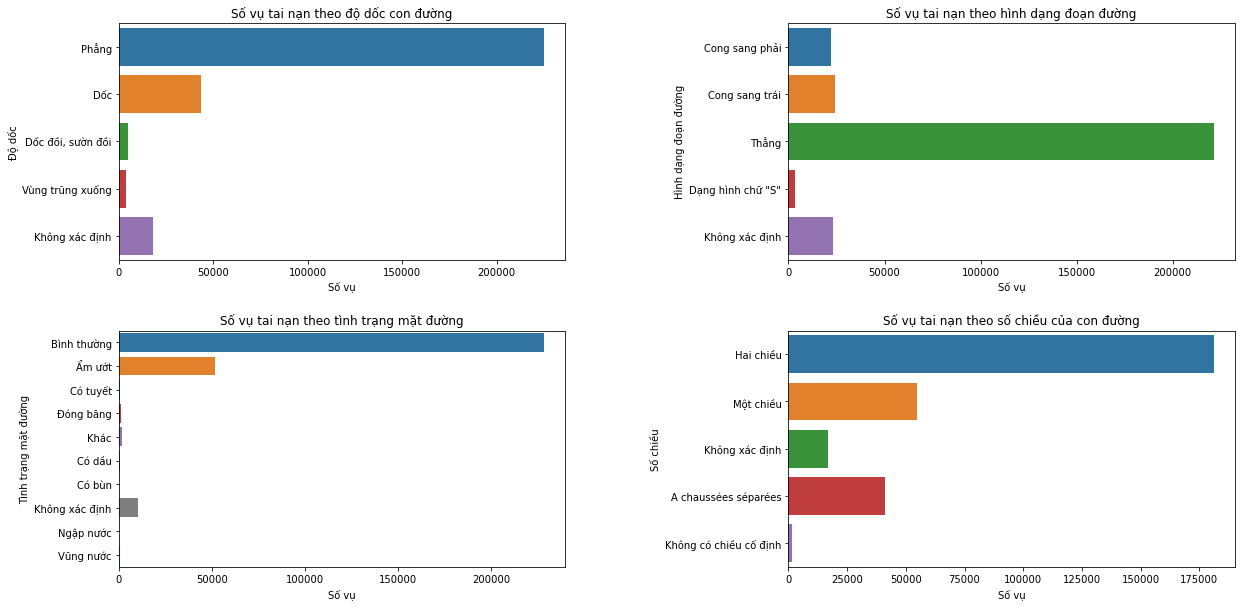

In [22]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.subplots_adjust(wspace=0.5, hspace = 0.3)

ax = plt.subplot(2, 2, 1)
sns.countplot(data=df_2_temp, y='prof')
ax.set(title='Số vụ tai nạn theo độ dốc con đường', xlabel='Số vụ', ylabel='Độ dốc')

ax = plt.subplot(2, 2, 2)
sns.countplot(data=df_2_temp, y='plan')
ax.set(title='Số vụ tai nạn theo hình dạng đoạn đường', xlabel='Số vụ', ylabel='Hình dạng đoạn đường')

ax = plt.subplot(2, 2, 3)
sns.countplot(data=df_2_temp, y='surf')
ax.set(title='Số vụ tai nạn theo tình trạng mặt đường', xlabel='Số vụ', ylabel='Tình trạng mặt đường')

ax = plt.subplot(2, 2, 4)
sns.countplot(data=df_2_temp, y='circ')
ax.set(title='Số vụ tai nạn theo số chiều của con đường', xlabel='Số vụ', ylabel='Số chiều')

plt.show()

* Như chúng ta đã dự đoán, độ dốc, tình trạng mặt đường và hình dạng đoạn đường dường như không ảnh hưởng nhiều đến số vụ tai nạn, y hệt như điều kiện ánh sáng và thời tiết: số vụ tai nạn __nhiều nhất__ và chiếm __đa số__ khi mặt đường phẳng, hoàn toàn khô ráo bình thường và đoạn đường xảy ra tai nạn cũng là đoạn đường thẳng
* Các điều kiện ngoại cảnh nguy hiểm như đường bị đóng băng, dốc đồi hay đoạn đường dạng chữ "S", theo chúng ta nghĩ thì sẽ xảy ra nhiều vụ tai nạn hơn, tuy nhiên biểu đồ lại thể hiện ngược lại: rất ít tai nạn xảy ra. __*Giải thích*:__ có lẽ là khi nguy hiểm như vậy thì người ta sẽ hạn chế ra đường, hoặc nếu có thì sẽ cẩn thận hơn trong lúc di chuyển -> giảm nguy cơ tai nạn
> Cỏ vẻ như điều kiện ngoại cảnh không phải là yếu tố quan trọng dẫn đến tai nạn

### File **usagers_final.csv** - Chi tiết về người bị tai nạn

In [23]:
df_3 = pd.read_csv('archive/usagers_final.csv')
df_3

,Num_Acc,place,catu,grav,sexe,trajet,secu,locp,actp,etatp,an_nais,num_veh
0,201800000001,1.0,1,3,1,0.0,11.0,0.0,0.0,0.0,1928.0,B01
1,201800000001,1.0,1,1,1,5.0,11.0,0.0,0.0,0.0,1960.0,A01
2,201800000002,1.0,1,1,1,0.0,11.0,0.0,0.0,0.0,1947.0,A01
3,201800000002,NaN,3,4,1,0.0,2.0,2.0,3.0,1.0,1959.0,A01
4,201800000003,1.0,1,3,1,5.0,21.0,0.0,0.0,0.0,1987.0,A01
...,...,...,...,...,...,...,...,...,...,...,...,...
662171,201400059853,2.0,2,4,2,0.0,11.0,0.0,0.0,0.0,1991.0,A01
662172,201400059854,1.0,1,1,1,9.0,11.0,0.0,0.0,0.0,1964.0,A01
662173,201400059854,1.0,1,1,1,9.0,11.0,0.0,0.0,0.0,1969.0,B01
662174,201400059854,2.0,2,4,2,9.0,11.0,0.0,0.0,0.0,1971.0,B01


In [24]:
df_3.drop(columns=['place', 'trajet', 'locp', 'actp', 'etatp', 'num_veh'], inplace=True)
df_3

,Num_Acc,catu,grav,sexe,secu,an_nais
0,201800000001,1,3,1,11.0,1928.0
1,201800000001,1,1,1,11.0,1960.0
2,201800000002,1,1,1,11.0,1947.0
3,201800000002,3,4,1,2.0,1959.0
4,201800000003,1,3,1,21.0,1987.0
...,...,...,...,...,...,...
662171,201400059853,2,4,2,11.0,1991.0
662172,201400059854,1,1,1,11.0,1964.0
662173,201400059854,1,1,1,11.0,1969.0
662174,201400059854,2,4,2,11.0,1971.0


Mô tả:
* __*catu*__: loại người bị tai nạn
    * 1 - Tài xế
    * 2 - Hành khách/ người đi cùng xe
    * 3 - Người đi bộ
    * 4 - Ván trượt, xe đẩy hay [scooter](https://www.google.com/search?q=scooter&rlz=1C1PRFI_enVN813VN813&sxsrf=ALeKk01BV0m0c8awDVyIOcNn0LWe9rQ40g:1622647677426&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjk96HTofnwAhXg7XMBHd0kC6QQ_AUoAXoECAIQAw&biw=1536&bih=760)
* __*grav*__: mức độ bị thương
    * 1 - Không bị thương
    * 2 - Tử vong
    * 3 - Nhập viện
    * 4 - Bị thương nhẹ
* __*sexe*__: giới tính
    * 1 - Nam
    * 2 - Nữ
* __*an_nais*__: năm sinh
* __*secu*__: thiết bị bảo hộ
    1. Chữ số đầu tiên: trang bị bảo hộ
    * 1 - Dây an toàn
    * 2 - Mũ bảo hiểm
    * 3 - [Thiết bị bảo hộ cho trẻ em](https://www.google.com/search?q=Dispositif+enfants&rlz=1C1PRFI_enVN813VN813&hl=vi&sxsrf=ALeKk00lA4gOitzU9AChGZeYA8_yVIZeWg:1622469718049&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjfz8_ZivTwAhUYSX0KHXXUAKcQ_AUoAXoECAEQAw&biw=1536&bih=760#imgrc=NSABYbPgI5qlOM)
    * 4 - [Trang bị/ đồ bảo hộ phản quang](https://www.google.com/search?q=Equipement+r%C3%A9fl%C3%A9chissant&rlz=1C1PRFI_enVN813VN813&sxsrf=ALeKk00UC6069X4_CkIN4TjbEgPs4zEd4w:1622469637158&source=lnms&tbm=isch&sa=X&ved=2ahUKEwjMsoazivTwAhVMOSsKHZTnAkkQ_AUoAXoECAEQAw&biw=1536&bih=760)
    * 9 - Khác
    2. Chữ số thứ 2: thiết bị bảo hộ có được kích hoạt hay không
    * 1 - Có
    * 2 - Không
    * 3 - Không xác định được

In [25]:
# Kiểm tra tỉ lệ % dữ liệu bị thiếu
df_3.isna().mean()*100

Num_Acc    0.000000
catu       0.000000
grav       0.000000
sexe       0.000000
secu       5.226405
an_nais    0.020991
dtype: float64

In [26]:
df_3_temp = df_3.copy()

#### Tài xế hay hành khách sẽ an toàn hơn khi tai nạn xảy ra? 

In [27]:
df_3_temp['catu'].replace({1:'Tài xế', 2:'Hành khách/ người đi cùng xe', 3:'Người đi bộ', 4:'Ván trượt, xe đẩy, scooter'}, inplace=True)
df_3_temp['grav'].replace({1:'Không bị thương', 2:'Tử vong', 3:'Nhập viện', 4:'Bị thương nhẹ'}, inplace=True)

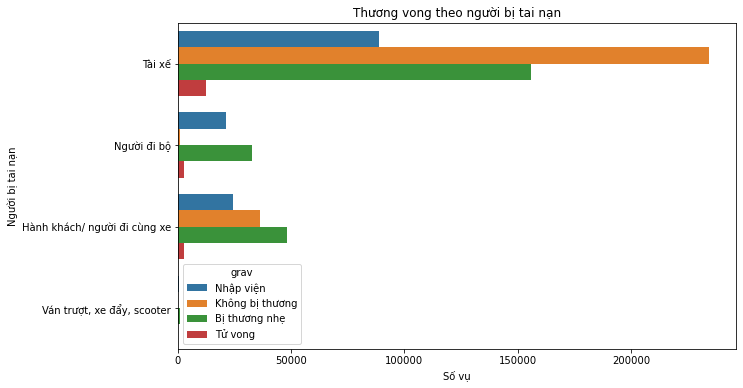

In [28]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data=df_3_temp, y='catu', hue='grav')
ax.set(title='Thương vong theo người bị tai nạn', xlabel='Số vụ', ylabel='Người bị tai nạn')
plt.show()

In [29]:
# Tỉ lệ tài xế không bị thương trong tai nạn
len(df_3_temp[(df_3_temp['catu'] == 'Tài xế') & (df_3_temp['grav'] == 'Không bị thương')])/len(df_3_temp[df_3_temp['catu'] == 'Tài xế'])*100

47.713618632726856

In [30]:
# Tỉ lệ Hành khách/ người đi cùng xe không bị thương trong tai nạn
len(df_3_temp[(df_3_temp['catu'] == 'Hành khách/ người đi cùng xe') & (df_3_temp['grav'] == 'Không bị thương')])/len(df_3_temp[df_3_temp['catu'] == 'Hành khách/ người đi cùng xe'])*100

32.49932861874497

* Tài xế chiếm số lượng lớn so với hành khách và các loại người còn lại -> phần lớn tai nạn xảy ra khi tài xế __đi 1 mình__
* Có vẻ như làm tài xế sẽ an toàn hơn khi tỉ lệ không bị thương trong tai nạn của tài xế là __47.7%__ so với chỉ __32.5%__ của hành khách. __*Giải thích*__: có 2 lí do
    * Tài xế sẽ chủ động tránh né theo phản xạ -> tránh thương vong cho chính mình nhưng với người đi cùng thì chưa chắc
    * Hầu hết các xe hiện nay trang bị bảo hộ cho ghế lái rất tốt, vượt trội so với các ghế còn lại
* Hầu hết những người đi bộ đều bị thương -> đương nhiên vì xe đụng người thì chắc chắn là xe không sao còn người thì có sao rồi :vv

### File **vehicules_final.csv** - Chi tiết về loại xe bị tai nạn

In [31]:
df_4 = pd.read_csv('archive/vehicules_final.csv')
df_4

,Num_Acc,senc,catv,occutc,obs,obsm,choc,manv,num_veh
0,201800000001,0.0,7,0,0.0,2.0,3.0,1.0,B01
1,201800000001,0.0,7,0,0.0,2.0,2.0,15.0,A01
2,201800000002,0.0,7,0,0.0,1.0,0.0,1.0,A01
3,201800000003,0.0,33,0,1.0,2.0,1.0,1.0,A01
4,201800000003,0.0,7,0,0.0,2.0,8.0,15.0,B01
...,...,...,...,...,...,...,...,...,...
505881,201400059852,0.0,33,0,0.0,0.0,0.0,14.0,A01
505882,201400059853,0.0,7,0,0.0,0.0,9.0,13.0,A01
505883,201400059854,0.0,7,0,0.0,2.0,1.0,2.0,A01
505884,201400059854,0.0,7,0,0.0,2.0,4.0,2.0,B01


In [32]:
df_4 = df_4.loc[:, ['Num_Acc', 'catv', 'occutc']]
df_4

,Num_Acc,catv,occutc
0,201800000001,7,0
1,201800000001,7,0
2,201800000002,7,0
3,201800000003,33,0
4,201800000003,7,0
...,...,...,...
505881,201400059852,33,0
505882,201400059853,7,0
505883,201400059854,7,0
505884,201400059854,7,0


* catv: loại xe

    * 01 - Xe đạp
    * 02 - Xe máy < 50cm3
    * 03 - Xe đẩy - Xe ba bánh có động cơ
    * 04 - Tham chiếu không còn được sử dụng từ năm 2006 (xe scooter)
    * 05 - Tham chiếu không còn được sử dụng từ năm 2006 (xe máy)
    * 06 - Tham chiếu không còn được sử dụng từ năm 2006 ([xe sidecar 3 bánh](https://www.google.com/search?q=side-car&rlz=1C1PRFI_enVN813VN813&sxsrf=ALeKk00GfQ_depzsXY8WhHP83nEIC5PeNA:1622472414515&tbm=isch&source=iu&ictx=1&fir=k-1WAhbn7jU8PM%252CSKtoK7MMwn1Q8M%252C_&vet=1&usg=AI4_-kQQR3QxrisZ1exohkH4l3n9he5Mdg&sa=X&ved=2ahUKEwiE67LflPTwAhXEfn0KHaEZAtYQ9QF6BAgQEAE#imgrc=hMqV8141Sh4EEM) - xe máy 3 bánh mà thời chiến tranh hay dùng)
    * 07 - VL car = passenger car: xe chở khách/ thương mại cỡ nhỏ - vừa
    * 08 - Danh mục không còn được sử dụng (VL + Xe cắm trại)
    * 09 - Hạng mục không còn được sử dụng (VL + rơ moóc)
    * 10 - VU car: Xe chuyên dụng (như xe công trình, xe chữa cháy, ...) có 1,5T <= tải trọng <= 3,5T có hoặc không có rơ moóc
    * 11 - Tài liệu tham khảo không còn được sử dụng từ năm 2006 (VU (10) + Xe cắm trại)
    * 12 - Tham chiếu không còn được sử dụng từ năm 2006 (VU (10) + rơ moóc)
    * 13 - PL car: xe chở hàng 3,5T < tải trọng <= 7,5T
    * 14 - PL car tải trọng > 7,5T
    * 15 - PL > 3,5T + rơ moóc
    * 16 - Xe đầu kéo
    * 17 - Xe đầu kéo có rơ moóc
    * 18 - Tham chiếu không còn được sử dụng từ năm 2006 (phương tiện công cộng)
    * 19 - Tham chiếu không còn được sử dụng từ năm 2006 ([tramway](https://fr.wikipedia.org/wiki/Tramway) - tàu cao tốc/ tàu điện)
    * 20 - Các loại xe đặc biệt (như xe mở đường tuyết, xe cứu hộ, ...)
    * 21 - Máy kéo nông trại
    * 30 - Xe tay ga < 50 cm3
    * 31 - 50 cm3 < Xe máy <= 125 cm3
    * 32 - 50 cm3 < Xe tay ga <= 125 cm3
    * 33 - Xe máy > 125 cm3
    * 34 - Xe tay ga > 125 cm3
    * 35 - Xe [quad](https://www.google.com/search?q=Quad&tbm=isch&ved=2ahUKEwiu37uUpPTwAhX7wnMBHcg_DxoQ2-cCegQIABAA&oq=Quad&gs_lcp=CgNpbWcQAzIECCMQJzIECAAQQzICCAAyAggAMgIIADICCAAyAggAMgIIADICCAAyAggAUOfzAljn8wJg3_8CaABwAHgAgAGLAYgBiwGSAQMwLjGYAQCgAQGqAQtnd3Mtd2l6LWltZ8ABAQ&sclient=img&ei=CAe1YK67FPuFz7sPyP-80AE&bih=760&biw=1536&rlz=1C1PRFI_enVN813VN813) nhẹ <= 50 cm3
    * 36 - Xe quad nặng > 50 cm3
    * 37 - Xe buýt
    * 38 - Xe buýt chạy đường dài
    * 39 - Tàu hỏa
    * 40 - [tramway](https://fr.wikipedia.org/wiki/Tramway) - tàu cao tốc/ tàu điện
    * 99 - Xe khác

* occutc: số người tham gia giao thông công cộng

In [33]:
# Kiểm tra tỉ lệ % dữ liệu bị thiếu
df_4.isna().mean()*100

Num_Acc    0.0
catv       0.0
occutc     0.0
dtype: float64

#### Loại phương tiện nào thường xuyên gây tai nạn nhất? Đề xuất giải pháp giảm tai nạn

In [34]:
pd.DataFrame({'Tỉ lệ số vụ tai nạn theo loại xe':df_4['catv'].value_counts(normalize=True)*100})

,Tỉ lệ số vụ tai nạn theo loại xe
7,62.495305
33,8.439451
10,5.575367
1,4.727745
2,3.685415
30,3.577684
31,2.523889
32,1.941544
34,1.612221
14,0.939935


* Vậy loại xe gây tai nạn nhiều nhất, và chiếm đa số hơn hẳn so với các loại xe khác là xe số __7 - passenger car__ tức là các xe ô tô cá nhân như sedan, SUV, ...

-> __*Đề xuất giải pháp:*__ Khuyến khích mọi người di chuyển bằng các __phương tiện công cộng__ như xe buýt hay tàu điện, ...

-> __*Hiệu quả ước tính:*__ Chắc chắn giảm mạnh số vụ tai nạn.

-> __*Lí do:*__
* Nhìn vào tỉ lệ số vụ tai nạn của các xe công cộng:
    * 37 - Xe buýt: __0.727%__
    * 38 - Xe buýt chạy đường dài: __0.199%__
    * 39 - Tàu hỏa: __0.028%__
    * 40 - Tàu cao tốc/ tàu điện: __0.138%__
    
-> Tất cả đều có tỉ lệ quá thấp so với __07 - passenger car__ là __62.5%__
* Khi mọi người chuyển sang sử dụng các phương tiện công cộng, lưu lượng xe tham gia giao thông sẽ giảm -> giảm tai nạn
* Ở file **usagers_final.csv**, ta có tìm được 1 insight là phần lớn tai nạn xảy ra khi tài xế đi 1 mình, như vậy đi phương tiện công cộng cũng sẽ giải quyết được vấn đề này -> giảm số vụ tai nạn

## Tổng kết các insight quan trọng

1. Tai nạn xảy ra __nhiều nhất__ vào __8 AM__ và __17 PM__, thời điểm mọi người đi làm và tan làm nên lưu lượng giao thông lớn, trong đó lúc tan làm sẽ xảy ra nhiều tai nạn hơn
2. Điều kiện ngoại cảnh (như thời tiết, ánh sáng, điều kiện mặt đường, hình dạng đoạn đường, ...) __xấu__ không phải là nguyên nhân chủ yếu gây tai nạn, mà nguyên nhân chủ yếu đến từ __người lái__, có thể do sự chủ quan hoặc sử dụng các chất kích thích như rượu bia, ...
3. Các vụ tai nạn __chủ yếu__ xảy ra ở những nơi __không có__ nút giao thông, đây là những nơi thường không có đèn tín hiệu, các xe di chuyển với vận tốc cao hơn rất nhiều so với nơi có nút giao thông
4. Phần lớn các vụ tai nạn xảy ra khi tài xế __đi 1 mình__, và tỉ lệ thương vong khá cao (khoảng __35%__)
5. Phương tiện gây tai nạn nhiều nhất, và chiếm phần lớn số vụ là ô tô cá nhân, xe máy cá nhân

__*Đề xuất giải pháp giảm tai nạn*__

1. Phân bố luồng giao thông hợp lí hơn để giảm lưu lượng giao thông
2. Cấm sử dụng chất kích thích khi lái xe, nâng cao sự tập trung của tài xế khi lái xe
3. Khuyến khích việc sử dụng phương tiện công cộng